In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as pl
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, confusion_matrix

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Step 1: Load the dataset
url = "data/email.csv"
df = pd.read_csv(url)

In [4]:
# Step 2: EDA
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [8]:
df['Message'].value_counts()

Message
Sorry, I'll call later                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                         12
Ok...                                                                                                                                       10
Ok                                                                                                                                           4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..     4
                                                                                                                                            ..
Will ü b going to esplanade fr home?                                                                                                  

In [9]:
# Step 2: Basic preprocessing and feature engineering 
df["email_length"] = df['Message'].apply(lambda x: len(x))
df['num_special_chars'] = df['Message'].apply(lambda x: sum([1 for c in x if c in ['@', '-', '_', '.']]))


In [10]:
df['Spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,email_length,num_special_chars,Spam
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,8,0
1,ham,Ok lar... Joking wif u oni...,29,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,1,1
3,ham,U dun say so early hor... U c already then say...,49,6,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,0,0


In [11]:
px.histogram(df, x='Category')

In [12]:
# Step 3: Modelling - Split data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Spam'], test_size=0.2)


In [13]:
#Pipeline
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

pipeline_svm.fit(X_train, y_train)

y_pred_train_svm = pipeline_svm.predict(X_train)

y_pred_test_svm = pipeline_svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train_svm)
test_accuracy = accuracy_score(y_test, y_pred_test_svm)

In [14]:
#Accuracy
print('SVM')
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("SVM Classification Report (Test Set):\n", classification_report(y_test, y_pred_test_svm))

SVM
Train Accuracy: 0.9952893674293405
Test Accuracy: 0.9856502242152466
SVM Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       964
           1       0.99      0.90      0.94       151

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



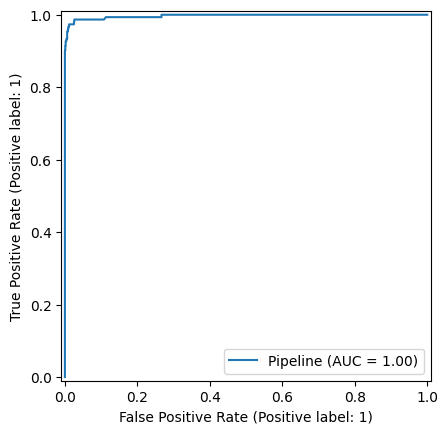

In [15]:
#ROC
RocCurveDisplay.from_estimator(pipeline_svm, X_test, y_test)

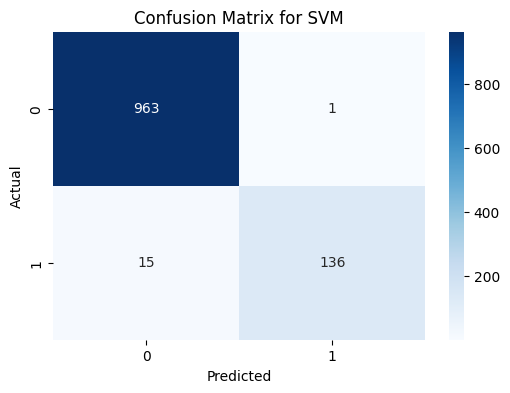

In [16]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_svm)
pl.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
pl.title('Confusion Matrix for SVM')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()